# Urban Farming in Milan, Italy
# Problem Statement


1. Identify Crops(vegetables, salads, fruits) suitable for Urban farming inlcuing environmental, climatic conditions in urban areas of Milan,Italy.

2. Develop an algorithm that takes into account the environmental conditions, location, and available infrastructure to predict the potential growth of crops in urban areas. The algorithm should analyze facltors such as sunlight exposure, soil quality, water availability, and temperature to determine the most suitable crops for a specific urban farming site.

3. Address the risks associated with urban farming to ensure a successful and sustainable operation. Minimise potential risks related to urban agriculture, social and economic risks, including health risks from wastewater irrigation, trace metal, zoonotic risks, and other health risks. By identifying and mitigating these risks, we can suggest solutions to potential urban farmers to create a safe and productive environment for growing crops in urban settings.


# Data Collection
Data is collected from different sources for vegetables, salads and fruits and synthetic data is generated considering the following features:

Dataset Details

Numerical Columns:\
\
Temperature - Climate Temperature in deg C\
Rainfall - Rainfall received in mm\
pH - Soil pH\
Light_Hours - Number of Light Hours\
Light_Intensity - Intensity measuers in μmol·m−2·s−1\
Rh - Relative Humidity measured in %\
Yield - Measured in 100g/ha
\
Categorical Columns:\
\
Name - Name of the crop\
Soil_Type - Type of the soil\
Fertility - Fertility of the soil\
Photoperiod\
N-P-K Ratio - Nitrogen-Phosphorous-Potassium ratio in the soil\
Season - Season the crop was grown in




# Data Understanding and Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import cm


# #mount Gdrive
# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
# reading the latest updated dataset into a dataframe for futher analysis
# df=pd.read_csv("/content/drive/MyDrive/MachineLearningProjects/AgritechMilano/synthetic_veg_normal_crop_data.csv")

# Read Vegetables, fruits and salads dataset 
df1=pd.read_csv('/kaggle/input/urbanagritechmilan/synthetic_fruits_normal_crop_data_700.csv')
df2=pd.read_csv('/kaggle/input/urbanagritechmilan/synthetic_salads_normal_crop_data_700.csv')
df3=pd.read_csv('/kaggle/input/urbanagritechmilan/synthetic_veg_normal_crop_data_700.csv')

# Combine all 3 datasets into one dataset
df = pd.concat([df1,df2,df3]).reset_index(drop=True)

# Drop the first column Serial No.
df.drop('S. no.', axis=1, inplace=True)
df.tail()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23800 entries, 0 to 23799
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             23800 non-null  object 
 1   Fertility        23800 non-null  object 
 2   Photoperiod      23800 non-null  object 
 3   N-P-K Ratio      23800 non-null  object 
 4   Temperature      23800 non-null  float64
 5   Rainfall         23800 non-null  float64
 6   pH               23800 non-null  float64
 7   Light_Hours      23800 non-null  float64
 8   Light_Intensity  23800 non-null  float64
 9   Rh               23800 non-null  float64
 10  Nitrogen         23800 non-null  float64
 11  Phosphorus       23800 non-null  float64
 12  Potassium        23800 non-null  float64
 13  Yield            23800 non-null  float64
 14  Category_pH      23800 non-null  object 
 15  Soil_Type        23800 non-null  object 
 16  Season           23800 non-null  object 
dtypes: float64(1

In [4]:
df.shape


(23800, 17)

*   There are 23,800 datapoints/rows and 17 features
*   Its observed that there are no null values or missing values in the dataset
*   Among the features, the below features have Categorical values
      * Name
      * Soil_Type      
      * Fertility         
      * Photoperiod    
      * N-P-K Ratio
      * Category_pH
      * Season  

In [5]:
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
print(df_unique)

           Variable  DistinctCount
0              Name             34
1         Fertility              3
2       Photoperiod              4
3       N-P-K Ratio             12
4       Temperature          23800
5          Rainfall          23800
6                pH          23800
7       Light_Hours          23800
8   Light_Intensity          23800
9                Rh          23800
10         Nitrogen          23800
11       Phosphorus          23800
12        Potassium          23800
13            Yield          23800
14      Category_pH              5
15        Soil_Type              8
16           Season              9


In [6]:
# Get numerical and categorical columns
# Display the count of unique values for Categorical Columns

# Remove leading and trailing spaces for values in Season column
df['Season'] = df['Season'].str.strip()
df['Soil_Type'] = df['Soil_Type'].str.strip()

df_ = df.select_dtypes(exclude=['int', 'float'])
print('Categorical Columns:')
print()
for col in df_.columns:
    print(df_[col].value_counts()) # to print count of every category
    print("\n")

Categorical Columns:

Name
Apple             700
Eggplants         700
Endive            700
Kale              700
Lettuce           700
Radicchio         700
Spinach           700
Tomatoes          700
Asparagus         700
Orange            700
Chilli Peppers    700
Cabbage           700
Cucumbers         700
Potatoes          700
Cauliflowers      700
Broccoli          700
Cress             700
Chard             700
Beet              700
Arugula           700
plum              700
pear              700
apricot           700
Grapes            700
Watermelon        700
Kiwi              700
Lemon             700
Cherries          700
Figs              700
Strawberry        700
Blueberry         700
Peach             700
Pomegranate       700
Green Peas        700
Name: count, dtype: int64


Fertility
High        14000
Moderate     6300
moderate     3500
Name: count, dtype: int64


Photoperiod
Short Day Period, Day Neutral                     11900
Short Day Period                     

# Descriptive Statistics

In [7]:
df.describe().T.round(decimals=2)


,count,mean,std,min,25%,50%,75%,max
Temperature,23800.0,21.98,4.38,9.36,18.80,21.42,24.73,39.91
Rainfall,23800.0,1048.78,372.44,409.93,756.62,995.84,1204.58,2786.34
pH,23800.0,6.24,0.84,2.94,6.03,6.43,6.69,8.22
Light_Hours,23800.0,10.71,2.71,5.04,7.48,12.02,13.03,16.72
Light_Intensity,23800.0,428.14,210.59,66.00,261.00,403.60,573.61,1028.68
Rh,23800.0,75.63,19.20,29.88,55.99,87.13,92.46,99.93
Nitrogen,23800.0,143.08,60.18,40.08,107.08,140.25,163.85,409.64
Phosphorus,23800.0,97.73,69.56,13.16,47.21,70.56,129.06,360.04
Potassium,23800.0,178.38,90.68,34.98,117.86,174.46,223.65,579.95
Yield,23800.0,17.79,14.50,0.77,6.31,15.92,23.62,66.62


# Data Visualization

## Plot Histogram for numeric variables to understand the distribution of data across numerical features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

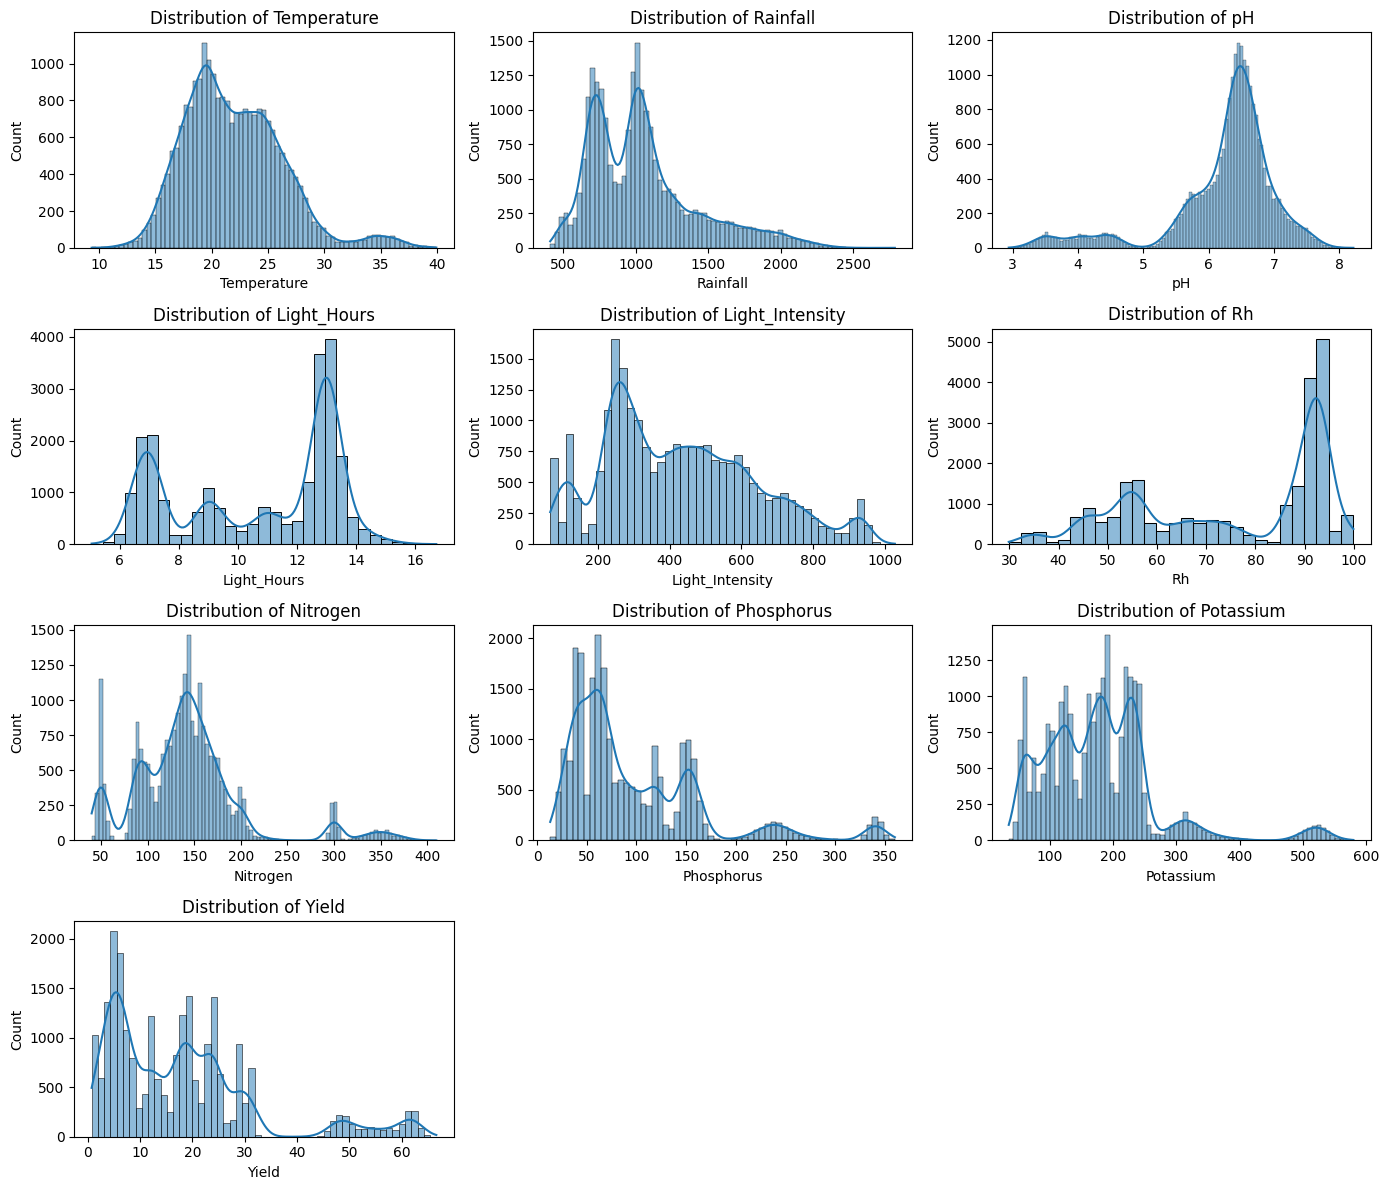

In [8]:
#histograms for each numeric(continuous) variable
#Get the numeric variables
numerical_columns = df.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(14, 12))

# We are creating a 4X3 subplot and Index is always set to '1'
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
#     print(f'Skewness for {var}:', df[var].skew())

plt.tight_layout()
plt.show()



In [9]:
for i, var in enumerate(numerical_columns, 1):
    print(f'Skewness for {var}:', df[var].skew())

Skewness for Temperature: 0.7438646317392943
Skewness for Rainfall: 1.0625023116918486
Skewness for pH: -1.637404620843114
Skewness for Light_Hours: -0.4090396793316706
Skewness for Light_Intensity: 0.48877438362649617
Skewness for Rh: -0.530005873412397
Skewness for Nitrogen: 1.3914444231146772
Skewness for Phosphorus: 1.6697545584575129
Skewness for Potassium: 1.5261230707775935
Skewness for Yield: 1.4064032447333743


* We check if the distribution of data is skewed, a higher positive skew value implies the distribution seems to be skewed (Temperature, Rainfall and Yield) otherwise quite lower value implies (even if its negative) not skewed at all (RH, Light Hours, PH).

## Let us try to understand how Categorical features are distributed 

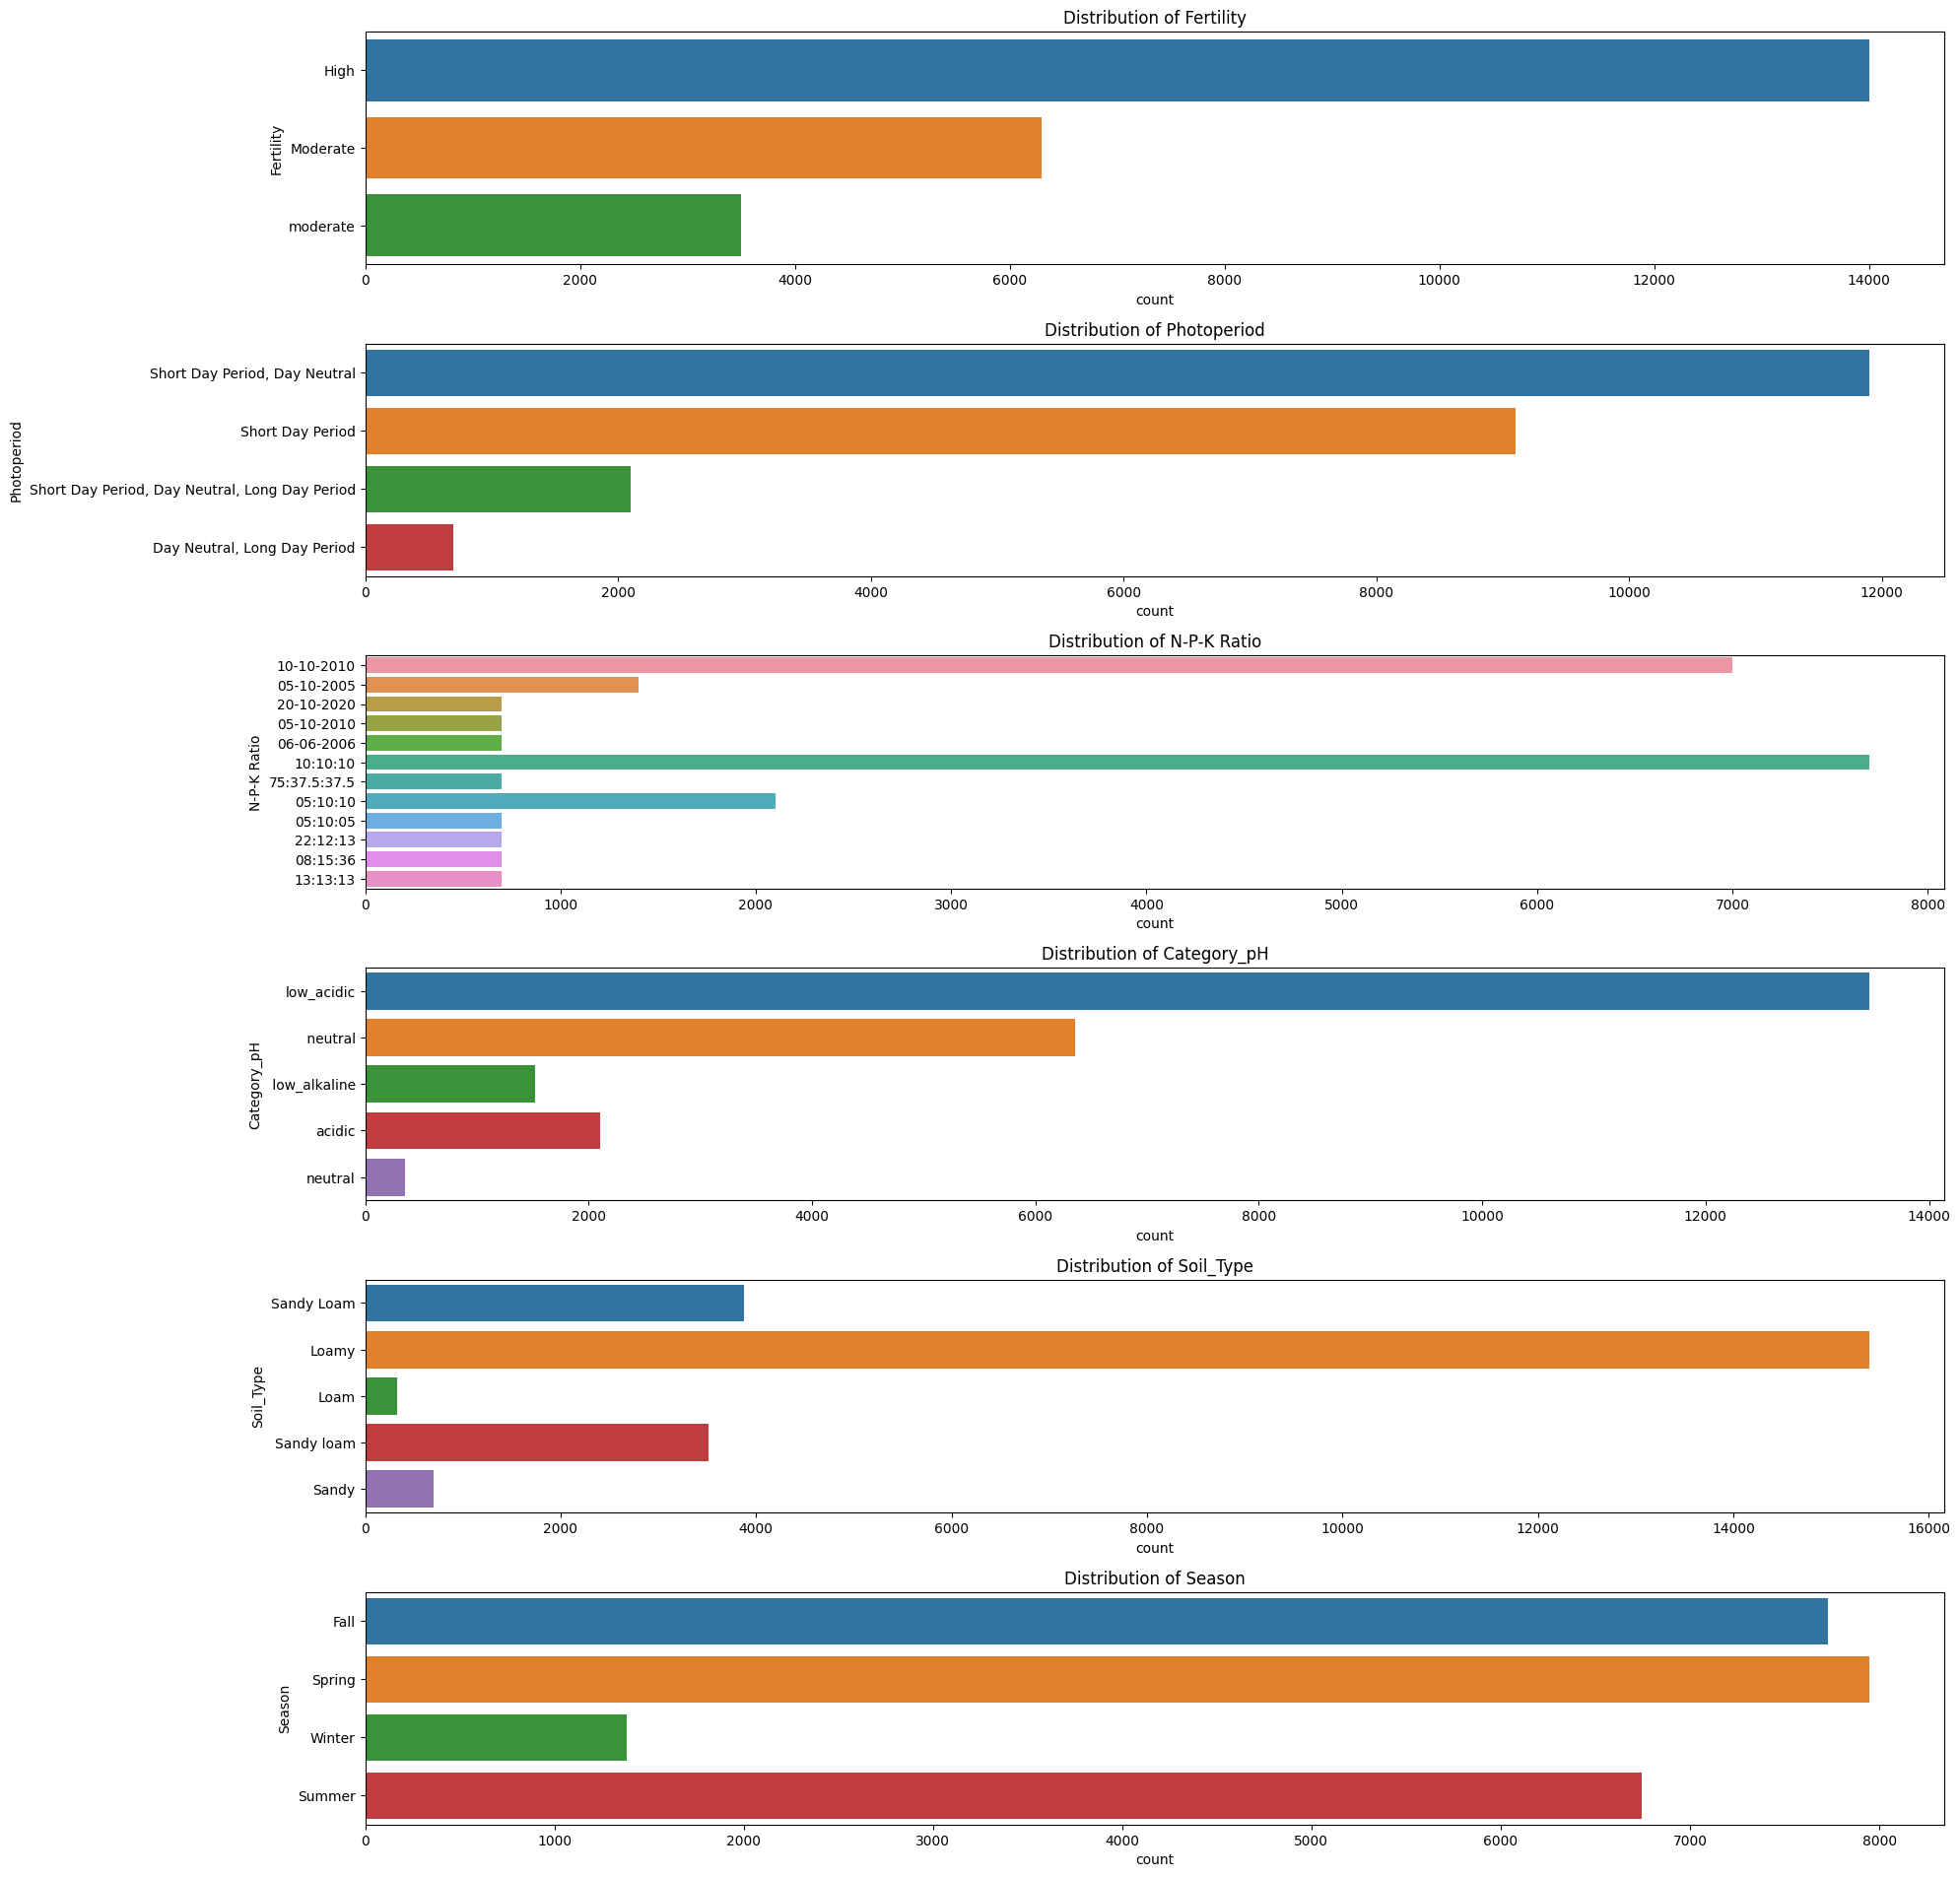

In [10]:
#Box plots for each Categorical variable
#Get the Categorical variables
cat_columns = df.select_dtypes(exclude=['int', 'float'])
plt.figure(figsize=(20, 28))

# We are creating a 4X3 subplot and Index is always set to '1'
for i, var in enumerate(cat_columns, 1):
    if var != 'Name':
        plt.subplot(9, 1, i)
        sns.countplot(df, y=df[var], orient='h')
        plt.title(f'Distribution of {var}')
   

plt.tight_layout()
plt.show()

## Analyse Corelation between features and target(Yield)
### To understand how well the features are related

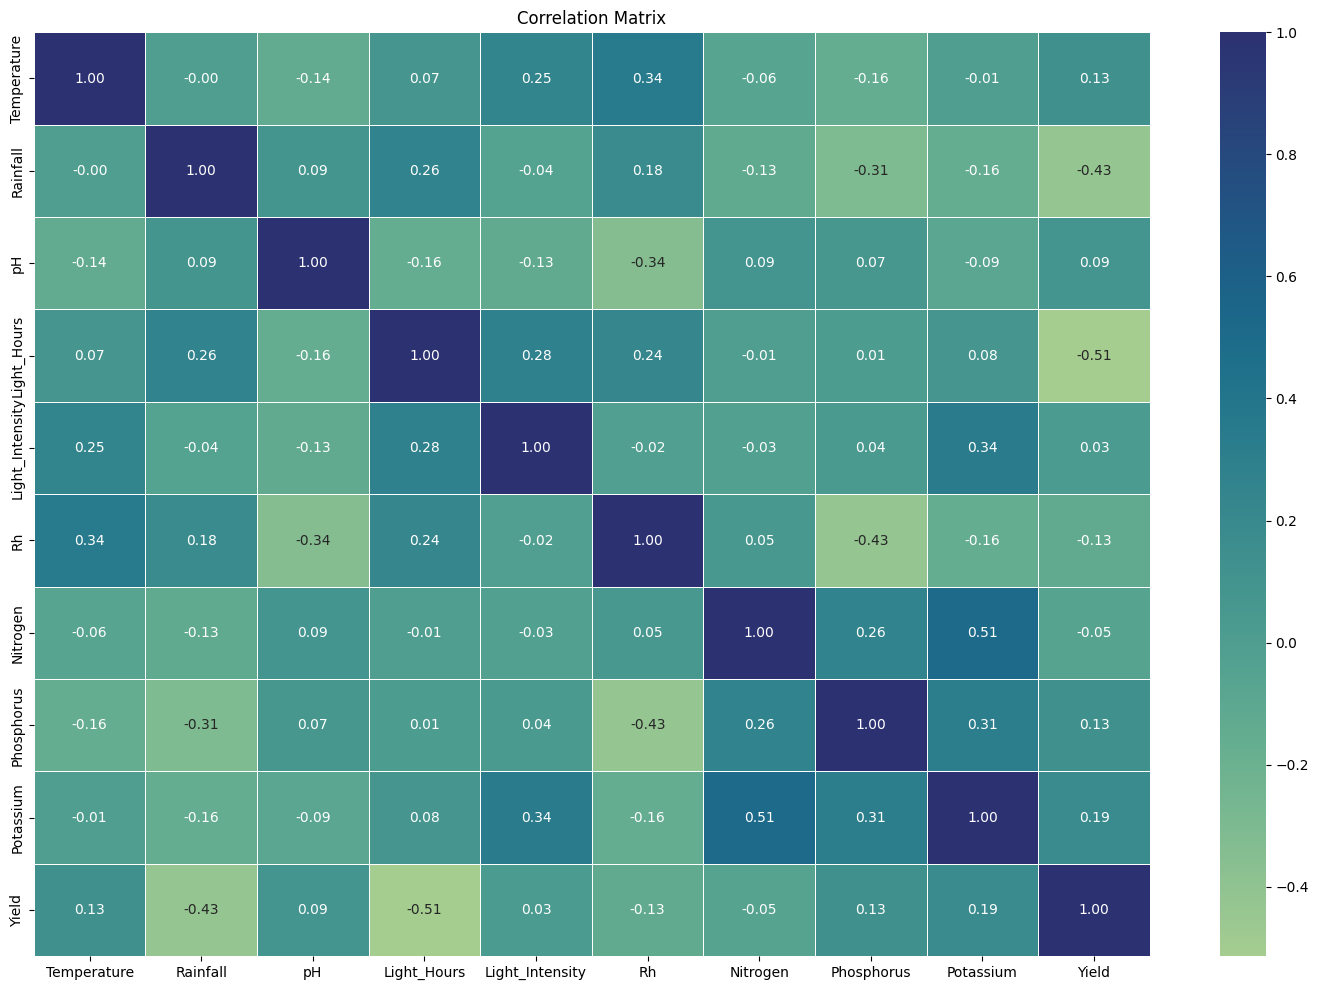

In [11]:
# Correlation matrix for numerical variables
correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()

# # Create a mask using numpy's triu function
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Based on the Corelation matrix, we observe that there is
  * negative corelation between Yield and Rainfall 
  * negative corelation is observed between Yield and Light Hours
  * positive, but not so strong corelation between Temperature and (RH and Light Intensity)
  * positive, but not so strong corelation between Rainfall and Light Hours


In [14]:
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    df[col] = df[col].astype('category').cat.codes


# Corelation between Yield and all other features
df[df.columns[1:]].corr()['Yield'][:]

Fertility         -0.228648
Photoperiod       -0.493500
N-P-K Ratio        0.359996
Temperature        0.133085
Rainfall          -0.428790
pH                 0.092268
Light_Hours       -0.513600
Light_Intensity    0.029683
Rh                -0.133325
Nitrogen          -0.053010
Phosphorus         0.131472
Potassium          0.185520
Yield              1.000000
Category_pH        0.130629
Soil_Type          0.527943
Season            -0.052654
Name: Yield, dtype: float64

* Positive corelation is observed between Yield to other features like Light Intensity, Temperature and NPK ratio
* negative corelation between Yield and Rainfall 
* negative corelation is observed between Yield and Light Hours

## Box Plot to Identify Outliers in Numerical Features

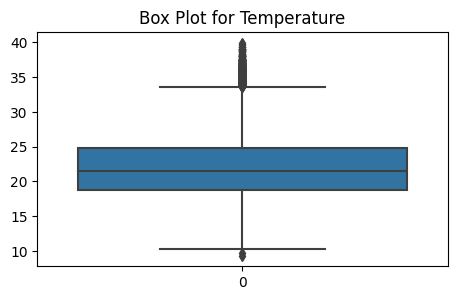

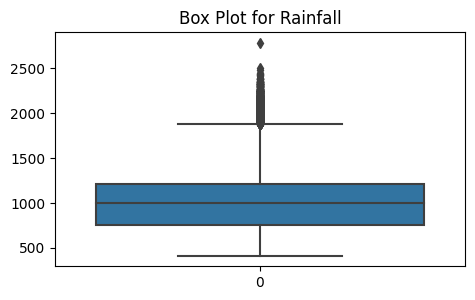

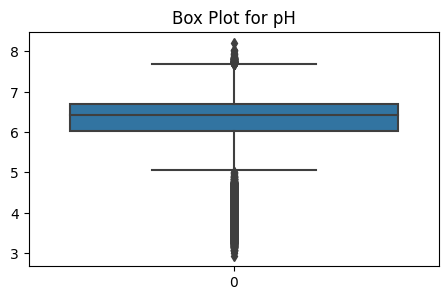

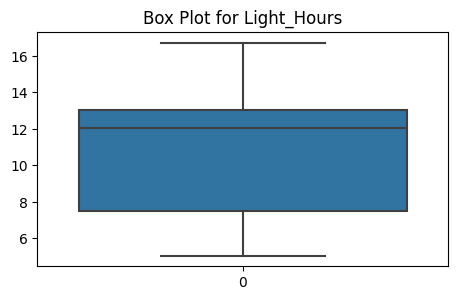

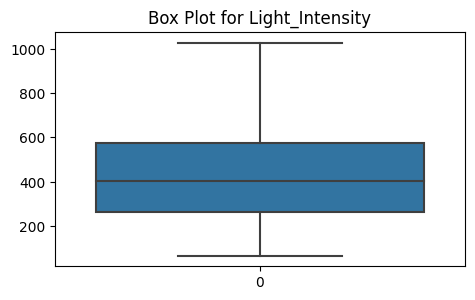

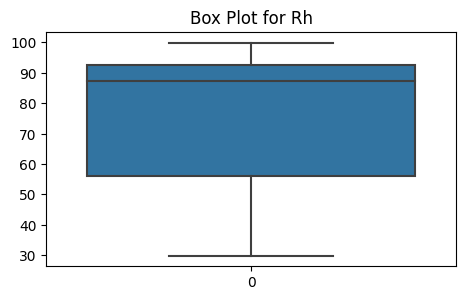

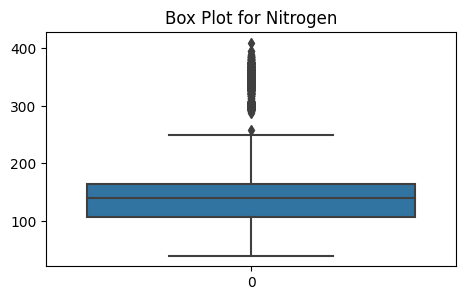

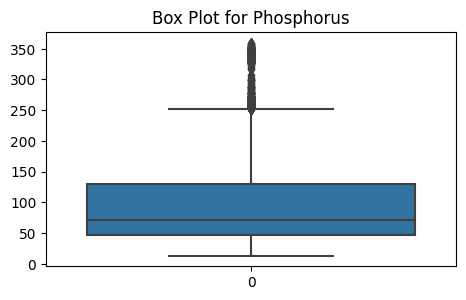

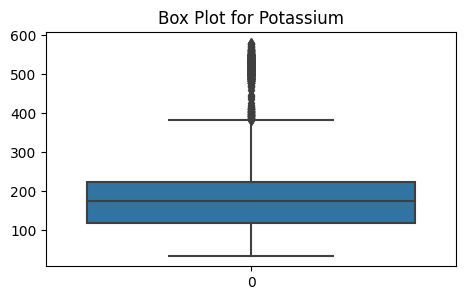

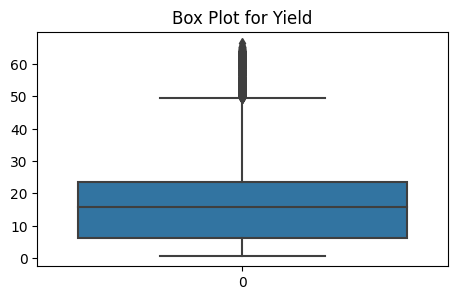

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot to detect Outliers and also Calculate the ZScores
# ‘Z score’ tells how many standard deviations away a data point is from the mean
    
for i, col in enumerate(numerical_columns, 1):
    #Visulaize distribution and outliers with a plot
    plt.figure(figsize=(18, 14))
    plt.subplot(4, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

plt.tight_layout()
plt.show()

* There are some outliers observed for features like PH, Rainfall and Temperature for different crops.    
* Handling of outliers need to be further analysed

In [ ]:
pip install ydata-profiling==4.0.0

In [11]:
from ydata_profiling import ProfileReport

# Produce and save the profiling report
profile = ProfileReport(df,title="Suitable Crops Profile Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Few obervations from the Ydata_profiling Report generated are as below:
    * Photoperiod is highly corelated with Light Hours
    * Category PH is highly corelated with PH
    --> One of the features among Photoperiod and Light Hours can be dropped as they are highly corelated. Same applies to features Category PH and PH.
    
    * There are no missing / null values in the dataset
    * There are no duplicates
    * There are no imbalances observed for any features
    
    
    

# **EDA Summary**

1.  There are 23,800 datapoints/rows and 17 features
2.  There are no null values or missing values in the dataset
3.  Among the features, the below features have Categorical values
      * Name
      * Soil_Type      
      * Fertility         
      * Photoperiod    
      * N-P-K Ratio
      * Category_pH
      * Season  
4.  Distribution seems to be skewed for Temperature, Rainfall and Yield whereas not skewed for RH, Light Hours, PH.
5. Among the Categorical features, Fertility has three categories - High , Moderate and moderate. However  Moderate and moderate sounds similar categories, this should be considered for merging.
6. Feature Soil Type has some categories that are similar which can be considered for merging.
7. Photoperiod feature is highly corelated with Light Hours. Perhaps one of the feature can be dropped.
8. Category pH is highly corelated with pH. One of these can be dropped.

